<a href="https://colab.research.google.com/github/ahmadalmasri270/sales-predictions/blob/main/Copy_of_Project_1_Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 5 (Core)

#Assignment:

1.   Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
2.   Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
3. Perform a train test split
4. Create a preprocessing object to prepare the dataset for Machine Learning
5. Make sure your imputation of missing values occurs after the train test split using SimpleImputer.




##1.Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2.Import all the Necessary Libraries.

In [ ]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  \
OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

#3.Load the Data.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#4.Explore the Data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#  Make a copy to Avoid any Manripulation
df_ml =df.copy()

#5.check for Duplicated values and drope Uniqe ID 

In [ ]:
# Drope the Uniqe ID
df_ml.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)

In [ ]:
# Check if there is Duplicated Values
df_ml.duplicated().sum()

0

In [ ]:
  #  How many data we using from the orginal data 
df_ml.dropna().shape[0] / df.shape[0]

0.5455825413586766

In [ ]:
df_ml.nunique

<bound method DataFrame.nunique of       Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP  Outlet_Estab

In [ ]:
## Checkand fix ordinal Value if we use the ordinal Encoding
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('LF', 'Low Fat')
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('reg', 'Regular')
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
## Checkand fix ordinal Value
df_ml['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df_ml['Outlet_Size'] = df_ml['Outlet_Size'].replace('High', 'Large')
df_ml['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

#6.Validation Split

In [ ]:
X = df_ml.drop(columns=['Item_Outlet_Sales'])
y = df_ml['Item_Outlet_Sales']

In [ ]:
# select only object columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25 , random_state=42)

# check value counts for each object column
categoricals = X_train.select_dtypes(include='object')

for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

Item_Fat_Content
Low Fat    4129
Regular    2263
Name: Item_Fat_Content, dtype: int64 

Item_Type
Fruits and Vegetables    948
Snack Foods              906
Household                695
Frozen Foods             632
Dairy                    507
Canned                   481
Baking Goods             478
Health and Hygiene       390
Soft Drinks              331
Meat                     302
Breads                   175
Hard Drinks              169
Others                   130
Starchy Foods            122
Breakfast                 84
Seafood                   42
Name: Item_Type, dtype: int64 

Outlet_Size
Medium    2103
Small     1788
Large      689
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type
Tier 3    2531
Tier 2    2106
Tier 1    1755
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type
Supermarket Type1    4166
Grocery Store         799
Supermarket Type3     723
Supermarket Type2     704
Name: Outlet_Type, dtype: int64 



##7.Instantiate Colume Selector

In [ ]:
#  Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
#instantiate the StandardScaler, OneHotEncoder, OrdinalEncoder and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

#this is showing for learning purpose but we are not using it here. 
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

# 8.Ordinal Encoder

In [ ]:
#create a list of ordinal labels, in order of least to most

outlet_size_lables = ['Small','Medium','Large']

#combine the ordered list in the order that the columns appear
ordered_labels = [outlet_size_lables]

#handle_unknown is 'error' by default.  That's a good place to start
#but it may cause problems in a production model.  
ordinal = OrdinalEncoder(categories = ordered_labels)

#9.Create a Pipeline Numeric Data and a Pipeline for Categorical Data

In [ ]:
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler)
ord_pipeline = make_pipeline(freq_imputer, ordinal)
nom_pipeline = make_pipeline(missing_imputer, ohe)

#10.Create Tuples to Pair Pipelines with Columns

In [ ]:
# Create column lists for objects and a number selector
ordinal_cols = ['Outlet_Size']
nominal_cols = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type']

num_selector = make_column_selector(dtype_include='number')

numeric_tuple = (num_pipeline, num_selector)
ordinal_tuple = (ord_pipeline, ordinal_cols)
nominal_tuple = (nom_pipeline, nominal_cols)

#11.Create Column Transformer to Apply Different Preprocessing to Different Columns

In [ ]:
# Instantiate the make column transformer

preprocessor = make_column_transformer(ordinal_tuple, 
                                          numeric_tuple, 
                                          nominal_tuple, 
                                          remainder='drop')

#12.Fit the Column Transformer on the Training Data

In [ ]:
# Fit the column transformer on the X_train

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'Large']]))]),
                                 ['Outlet_Size']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7cb277fd50>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

#13.Transform Both Training and Testing Data

In [ ]:
# Transform the X_train and the X_test

X_train_transformed = preprocessor.transform(X_train)

X_test_transformed = preprocessor.transform(X_test)

In [ ]:
X_train_transformed.shape

(6392, 30)

##Check the Result

In [ ]:
X_train_transformed[:5]

array([[ 1.        ,  0.81724868, -0.71277507,  1.82810922,  1.32784893,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.        ,  0.5563395 , -1.29105225,  0.60336888,  1.32784893,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.        , -0.13151196,  1.81331864,  0.24454056,  0.13618724,
         0.        ,  1.        ,  0.        ,  0

In [ ]:
np.isnan(X_train_transformed).sum()

0

#Project 1 - Final

 # 1. linear regression

In [ ]:
# Import 
from sklearn.linear_model import LinearRegression


In [ ]:
#create linear regression model
reg_model = LinearRegression()
reg_pipe = make_pipeline(preprocessor, reg_model)
# Fit the Model Pipline to Training Data 
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large']]))]),
                                                  ['Outlet_Size']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7cb277fd50>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('linearregression', LinearRegression())])

###Eamine the prediction and ERRORS

In [ ]:
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)
test_pred[:5]

array([1344.  ,  789.25,  826.5 , 4233.5 , 3274.  ])

In [ ]:
predictions_df =X_test.copy()
predictions_df['True Midan Price']=y_test
predictions_df['Pridiction Median Price']= test_pred
predictions_df['Errors']= test_pred - y_test
predictions_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,True Midan Price,Pridiction Median Price,Errors
7503,14.300,Low Fat,0.026300,Frozen Foods,79.4302,1987,Large,Tier 3,Supermarket Type1,1743.0644,1344.00,-399.0644
2957,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,1997,Small,Tier 1,Supermarket Type1,356.8688,789.25,432.3812
7031,14.500,Regular,0.041313,Canned,42.0454,1999,Medium,Tier 1,Supermarket Type1,377.5086,826.50,448.9914
1084,NaN,Regular,0.044767,Soft Drinks,173.7054,1985,Medium,Tier 3,Supermarket Type3,5778.4782,4233.50,-1544.9782
856,10.195,Regular,0.012456,Meat,197.5110,2004,Small,Tier 2,Supermarket Type1,2356.9320,3274.00,917.0680


###Evaluate the performance of your model based on R^2.

In [ ]:
## Measuring model performance R^2
print(f"Train R-Squared: { round( reg_pipe.score(X_train, y_train),3) }")
print(f"Test R-Squared: { round( reg_pipe.score(X_test, y_test),3) }")

Train R-Squared: 0.561
Test R-Squared: 0.566


This module is 56% fitting the data between the training and the testing 

###Evaluate the performance of your model based on RMSE.

In [ ]:
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))
print(f'Training RMSE: {train_RMSE}')
print(f'Testing RMSE: {test_RMSE}')

Training RMSE: 1140.3738421485757
Testing RMSE: 1094.446732618087


This module have larger errors 

# 2.build a regression tree model to predict sales

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree = DecisionTreeRegressor(random_state=42)
train_x = pd.get_dummies(X_train)

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [ ]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(f'Training R2 Score: {train_score}')
print(f'Testing R2 Score: {test_score}')

Training R2 Score: 1.0
Testing R2 Score: 0.17057656596427562


This module has the best result for the training data but does badly in testing the data its overfitting

In [ ]:
train_RMSE = np.sqrt(np.mean(np.abs(train_preds - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_preds - y_test)**2))
print(f'Training RMSE: {train_RMSE}')
print(f'Testing RMSE: {test_RMSE}')

Training RMSE: 5.50728349323243e-15
Testing RMSE: 1512.7327643966612


The traning data have a less errors than the testing 

linear regression model is the superior model for this data set. It seems to give more accurate results in comparison to the Decision tree regression .

However I do not think that this model is correct and needs revision.

In [ ]:
dec_tree.get_depth()


40

In [ ]:
import matplotlib.pyplot as plt 


ValueError: ignored

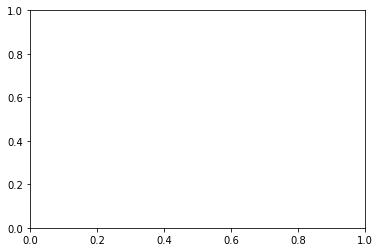

In [ ]:
plt.scatter(X_test, y_test, color ="red")
plt.plot(X_train, reg_model.predict(X_train) 
, color='blue')
